## Build A Basic  Chatbot With Langgraph (GraphAPI)

In [2]:
print("hello")

hello


In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# (reducer) add_messages:- for add list of messages like. we can keep list of messages and adding the messages into it within a session 


d:\Langgraph\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [4]:
class State(TypedDict):
    # Messages have the type "List". the add_messages function
    # in the annotation defines how this state key should be updated
    # (in this case , it appends messages to the list, rather than overwriting them)
    messages: Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [5]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [15]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model='llama-3.1-8b-instant')

In [ ]:
llm2=init_chat_model=("groq:llama-3.1-8b-instant")

In [8]:
## Node functionality
def chatbot(state: State):
    return {'messages': [llm.invoke(state['messages'])]}

In [9]:
graph_builder

In [10]:
graph_builder.add_node("llmChatBot",chatbot)

graph_builder.add_edge(START,'llmChatBot')
graph_builder.add_edge('llmChatBot',END)

In [11]:
# compilation
graph = graph_builder.compile()

In [ ]:
graph.invoke({'messages': 'hii'})
graph.invoke({'messages': 'ok tell me about AI'})

{'messages': [HumanMessage(content='ok tell me about AI', additional_kwargs={}, response_metadata={}, id='73ca2beb-ae06-4234-bf28-4d5b67ec179c'),
  AIMessage(content='Artificial Intelligence (AI) is a broad field of computer science that focuses on creating intelligent machines capable of performing tasks that typically require human intelligence. AI involves developing algorithms and statistical models that enable computers to learn, reason, and interact with their environment.\n\n**History of AI:**\n\nThe term "Artificial Intelligence" was first coined in 1956 by computer scientist John McCarthy. Since then, AI has undergone several waves of development, including:\n\n1. **First wave (1956-1970s):** AI research focused on developing programming languages and techniques for symbolic manipulation, such as expert systems and rule-based systems.\n2. **Second wave (1980s-1990s):** AI research shifted to machine learning and neural networks, which enabled computers to learn from data and i

In [ ]:
graph.invoke({'messages': 'ok tell me about AI'})

{'messages': [HumanMessage(content='ok tell me about AI', additional_kwargs={}, response_metadata={}, id='94e09c93-e189-4899-a5c9-f33ef11ff2bd'),
  AIMessage(content="Artificial Intelligence (AI) is a broad field of computer science that focuses on creating intelligent machines that can think, learn, and behave like humans. AI involves developing algorithms, statistical models, and computer programs that enable machines to perform tasks that typically require human intelligence, such as:\n\n1. **Learning**: AI systems can learn from data, experiences, and interactions to improve their performance and make predictions.\n2. **Reasoning**: AI systems can draw conclusions, make decisions, and solve problems using logic, rules, and data.\n3. **Perception**: AI systems can interpret and understand sensory data, such as images, speech, and text.\n4. **Action**: AI systems can interact with the environment, take actions, and make decisions.\n5. **Creativity**: AI systems can generate new ideas

## Chat bot with tools

In [19]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_result=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://huggingface.co/learn/agents-course/en/unit2/langgraph/when_to_use_langgraph',
   'title': 'What is LangGraph ? - Hugging Face Agents Course',
   'content': '# What is LangGraph ? `LangGraph` is a framework developed by LangChain **to manage the control flow of applications that integrate an LLM**. ## When should I use LangGraph ? `LangGraph` is on the other end of the spectrum, it shines when you need **“Control”** on the execution of your agent. LangGraph is particularly valuable when you need **Control over your applications**. It gives you the tools to build an application that follows a predictable process while still leveraging the power of LLMs. Put simply, if your application involves a series of steps that need to be orchestrated in a specific way, with decisions being made at each junction point, **LangGraph provides the structure you need**. ## How does L

In [37]:
# the above is docstring: once we bind the tools and function then llm can understand what is the functionality

def multiply(a: int, b: int) -> int:
    """
    Multiply a and b.

    Args:
        a (int): first integer
        b (int): second integer

    Returns:
        int: output integer
    """
    return a * b

    

In [38]:
tools=[tool, multiply]

In [39]:
llm_with_tool=llm.bind_tools(tools)

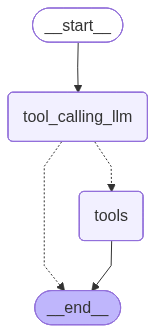

In [51]:
## state graph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {'messages':[llm_with_tool.invoke(state['messages'])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## edges
builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges('tool_calling_llm',
        # If the latest message (result) from assistant is a tool call -> tools_condtion routes to tools
        # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
        tools_condition
)
builder.add_edge('tools',END)

## compilation
graph = builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [44]:
res = graph.invoke({'messages': 'what is the recent ai news'})
res['messages'][-1]

ToolMessage(content='{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.fintechfutures.com/ai-in-fintech/2025-top-five-ai-stories-of-the-year", "title": "2025: Top five AI stories of the year - FinTech Futures", "score": 0.7657514, "published_date": "Wed, 24 Dec 2025 10:01:25 GMT", "content": "Here, FinTech Futures reflects on five of the top AI news stories from 2025, including new partnerships, incoming appointments, innovative integrations, and agentic AI. \\n\\n## UK\'s FCA launches AI sandbox in collaboration with Nvidia\\n\\nThe UK\'s Financial Conduct Authority (FCA) revealed plans in June to launch a new sandbox to \\"help firms experiment safely with AI to support innovation\\" in collaboration with Nvidia. [...] AI in Fintech\\n BankingTech\\n FinTech\\n News\\n\\n# 2025: Top five AI stories of the year\\n\\nFinTech Futures revisits five of the top AI news stories from 2025.\\n\\nTyler Pathe, Reporter, FinTe

In [46]:
for m in res['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the recent ai news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (6dkvxhcbm)
 Call ID: 6dkvxhcbm
  Args:
    query: recent AI news
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.fintechfutures.com/ai-in-fintech/2025-top-five-ai-stories-of-the-year", "title": "2025: Top five AI stories of the year - FinTech Futures", "score": 0.7657514, "published_date": "Wed, 24 Dec 2025 10:01:25 GMT", "content": "Here, FinTech Futures reflects on five of the top AI news stories from 2025, including new partnerships, incoming appointments, innovative integrations, and agentic AI. \n\n## UK's FCA launches AI sandbox in 

In [49]:
res1 = graph.invoke({'messages': 'what is 2 multiply by 3 & give recent news'}) ## docstring

In [50]:
for m in res1['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2 multiply by 3 & give recent news
================================== Ai Message ==================================
Tool Calls:
  multiply (rm5sc0y6g)
 Call ID: rm5sc0y6g
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6


## ReAct Architechture

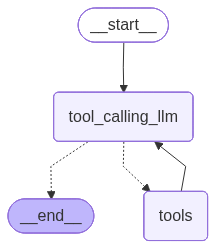

In [53]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {'messages':[llm_with_tool.invoke(state['messages'])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## edges
builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges('tool_calling_llm',
        # If the latest message (result) from assistant is a tool call -> tools_condtion routes to tools
        # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
        tools_condition
)
builder.add_edge('tools','tool_calling_llm')

## compilation
graph = builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [54]:
res1 = graph.invoke({'messages': 'what is 2 multiply by 3 & give recent news'}) ## docstring
for m in res1['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2 multiply by 3 & give recent news
================================== Ai Message ==================================
Tool Calls:
  multiply (kxpf84ya9)
 Call ID: kxpf84ya9
  Args:
    a: 2
    b: 3
  tavily_search (66gjnc9yy)
 Call ID: 66gjnc9yy
  Args:
    end_date: None
    query: recent news
    search_depth: advanced
    start_date: 2024-01-01
    topic: news
================================= Tool Message =================================
Name: multiply

6
================================= Tool Message =================================
Name: tavily_search

{"query": "recent news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.cbsnews.com/chicago/video/chef-in-new-york-sells-popular-fried-rice-from-trunk-of-his-car/", "title": "Chef in New York sells popular fried rice from trunk of his car - CBS News", "score": 0.54245186, "published_date": "Mon, 17